**1. Importing the dependencies**


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**2. Data collection and preprocessing**

In [2]:
churn_data = pd.read_csv("C:/Users/Mahdi/OneDrive/Desktop/Projects/Customer Churn Prediction/dataset/churndata.csv")

In [3]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_data.drop(columns= 'customerID', inplace= True)

In [5]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
churn_data.shape

(7043, 20)

In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# Printing unique values in all the columns
numerical_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in churn_data.columns:
    if col not in numerical_col:
        print(f"{col} : ",churn_data[col].unique())
        print("-"*50)

gender :  ['Female' 'Male']
--------------------------------------------------
SeniorCitizen :  [0 1]
--------------------------------------------------
Partner :  ['Yes' 'No']
--------------------------------------------------
Dependents :  ['No' 'Yes']
--------------------------------------------------
PhoneService :  ['No' 'Yes']
--------------------------------------------------
MultipleLines :  ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService :  ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity :  ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup :  ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection :  ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport :  ['No' 'Yes' 'No internet service']
--------------------------------------------------
Stre

In [13]:
churn_data[churn_data['TotalCharges'] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
len(churn_data[churn_data['TotalCharges'] == ' '])

11

In [15]:
churn_data['TotalCharges'].replace({" " : '0.0'}, inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_19304\3024815185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['TotalCharges'].replace({" " : '0.0'}, inplace= True)


In [16]:
churn_data['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [17]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

In [18]:
# checking the class distribution of target column
churn_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**Insights**
1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the TotalCharge column were replaced with 0
4. Class imbalance identified in the target column

**3. EDA**

In [19]:
churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Works only on numerical datatype
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Numerical features - analysis

Understand the distribution of the Numerical features

In [22]:
def plot_hist(churn_data, column_name):
    plt.figure(figsize= (5, 3))
    sns.histplot(churn_data[column_name], kde= True)
    plt.title(f"Histplot of {column_name}")
    
    # Calculating mean and median used for the column
    col_mean = churn_data[column_name].mean()
    col_median = churn_data[column_name].median()
    
    # Adding verticle line for mean and median
    plt.axvline(col_mean, color= 'red', linestyle= '--', label= "Mean", linewidth= 1)
    plt.axvline(col_median, color= 'green', linestyle= '-', label= "Median", linewidth= 1)

    plt.legend()

    plt.show()

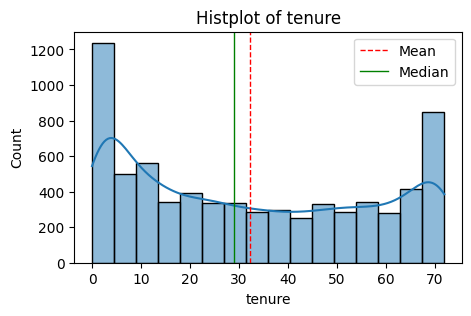

In [23]:
plot_hist(churn_data, "tenure")

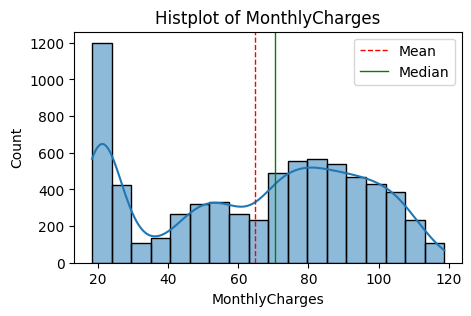

In [24]:
plot_hist(churn_data, "MonthlyCharges")

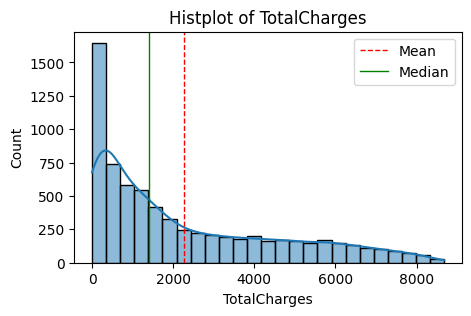

In [25]:
plot_hist(churn_data, 'TotalCharges')

In [26]:
# Boxplot for numerical column
def box_plot(churn_data, column_name):
    plt.figure(figsize= (5, 3))
    sns.boxplot(churn_data[column_name])
    plt.title(f"Box plot for {column_name}")
    plt.show()

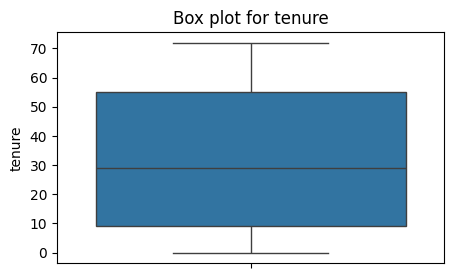

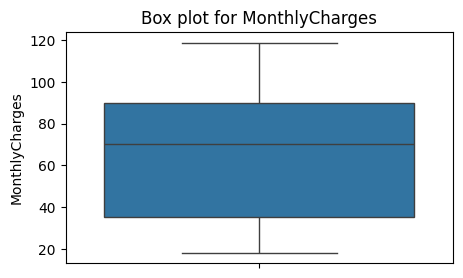

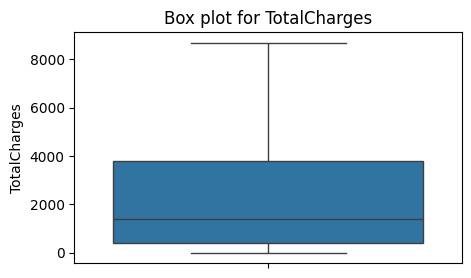

In [27]:
for i in numerical_col:
    box_plot(churn_data, i)


There are no outlier

**Converting categorical to numerical**

In [28]:
categorical_to_numerical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']

In [29]:
label_encoder = LabelEncoder()

In [42]:
encoders = {}

for col in churn_data:
    if col in categorical_to_numerical:
        churn_data[col] = label_encoder.fit(churn_data[col]).transform(churn_data[col])
        encoders[col] = label_encoder

# Save the encoder to a pickle file
with open("encoder.pkl", 'wb') as f:
    pickle.dump(encoders, f)

In [43]:
encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [31]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


**Correlation heatmap for numerical columns**

<Axes: >

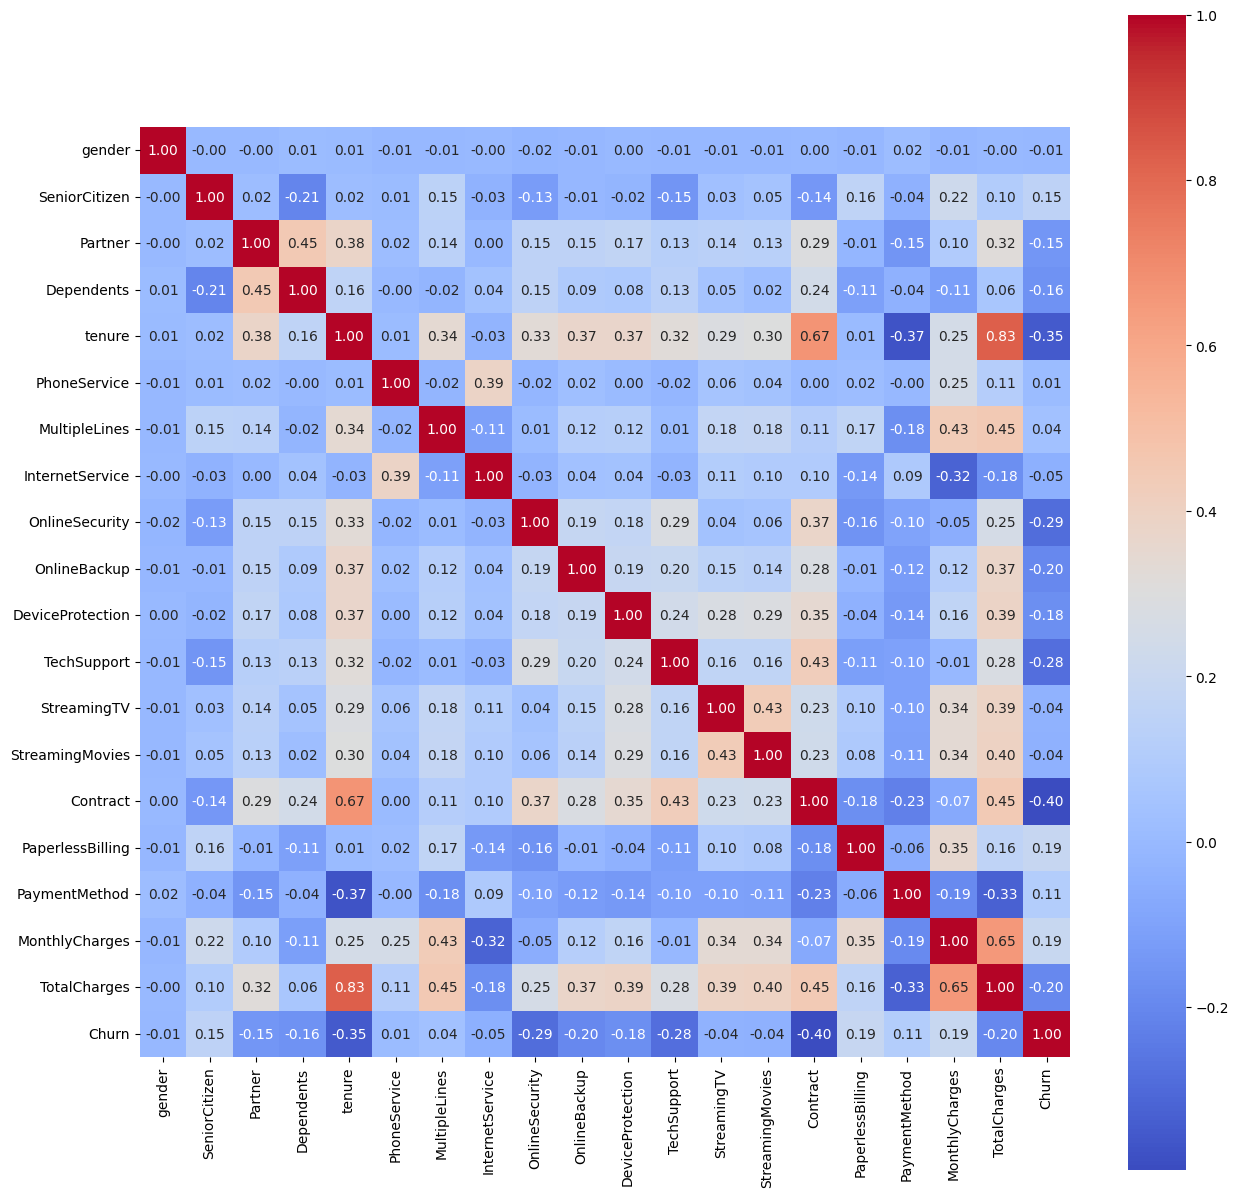

In [32]:
# correlation matrix - heatmap
plt.figure(figsize= (15, 15))
sns.heatmap(churn_data.corr(), cbar= True, annot= True, square= True, fmt= '.2f', cmap= 'coolwarm')

<Axes: >

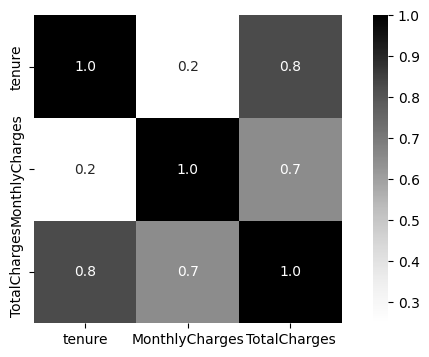

In [33]:
plt.figure(figsize= (8, 4))
sns.heatmap(churn_data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot= True, square= True, cbar= True, fmt= '.1f', cmap= 'Grays')

**Categorical features analysis**

In [ ]:
def distribution(churn_data, col_name):
    if col in categorical_to_numerical:
        

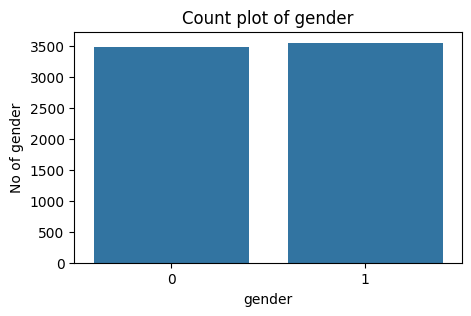

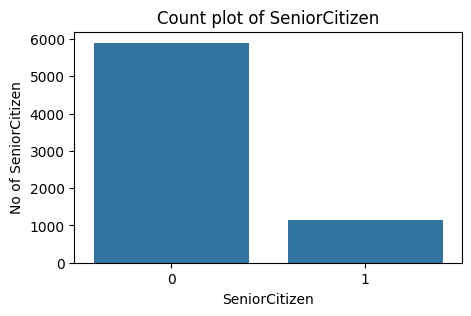

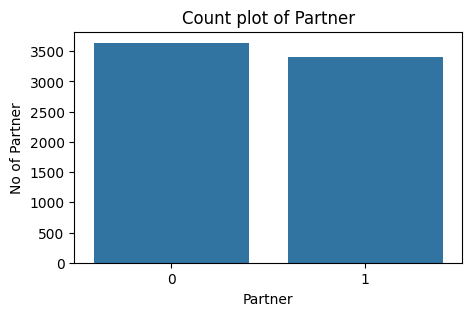

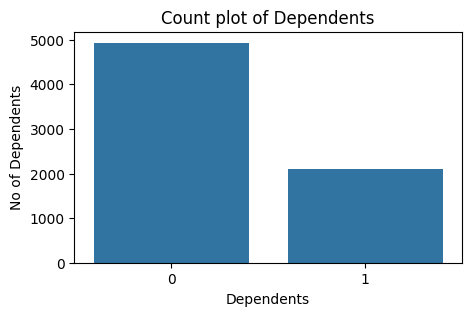

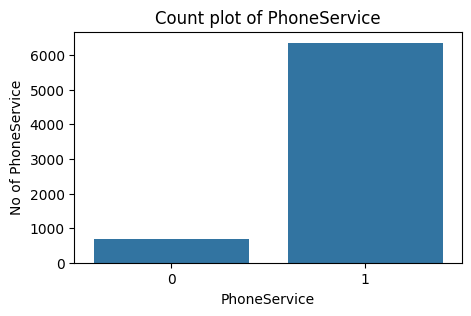

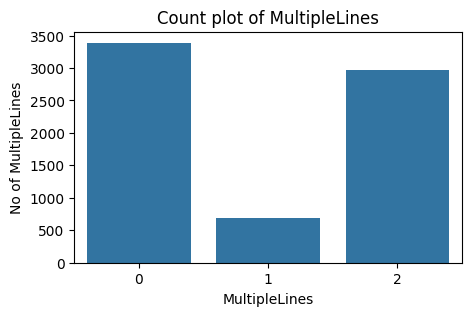

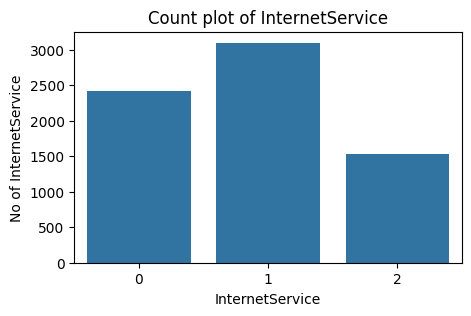

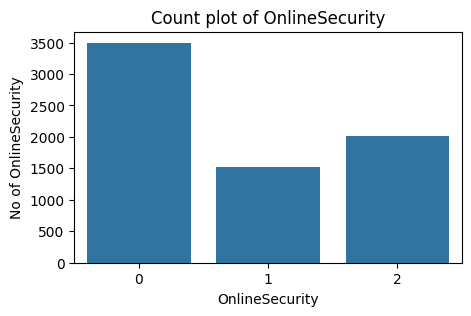

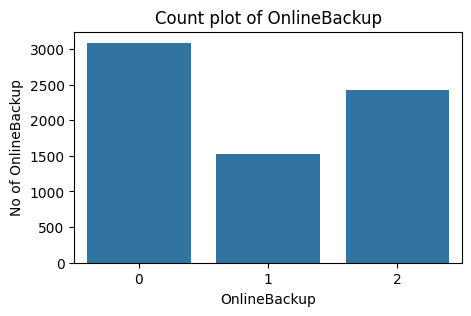

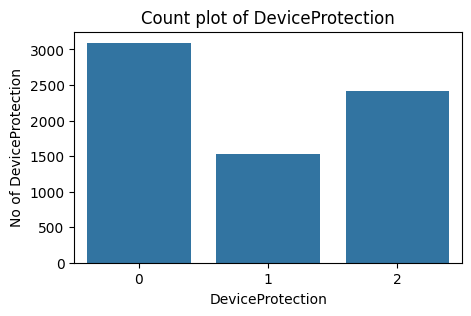

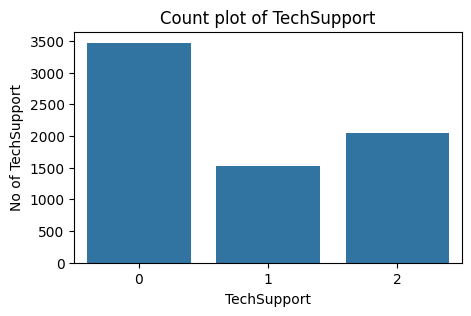

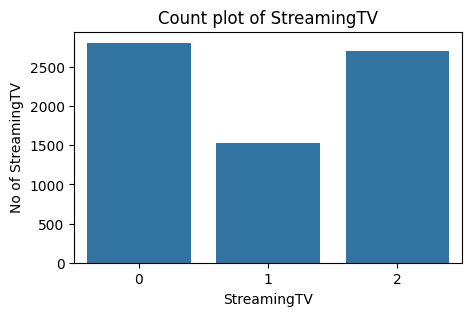

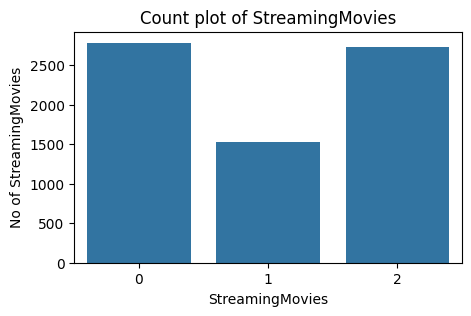

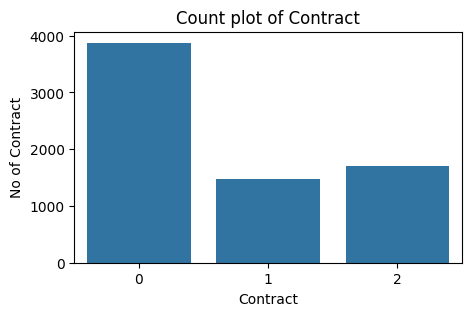

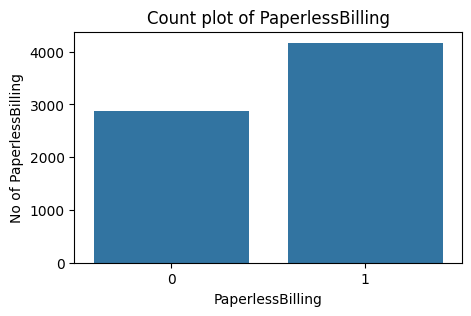

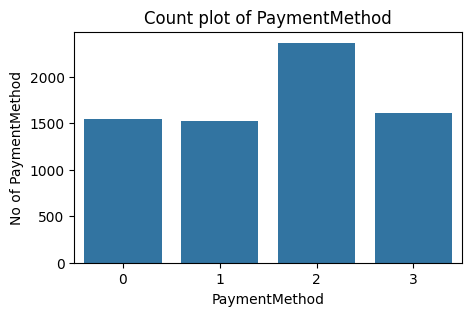

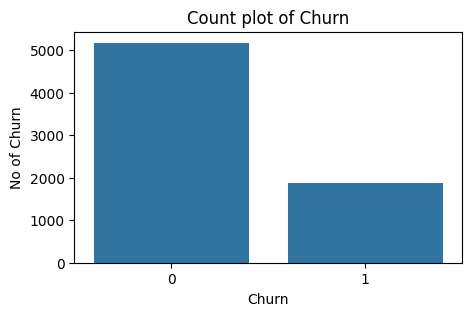

In [38]:
for col in categorical_to_numerical:
    plt.figure(figsize= (5, 3))
    sns.countplot(x= churn_data[col])
    plt.title(f"Count plot of {col}")
    plt.ylabel(col)
    plt.ylabel(f"No of {col}")
    plt.show()

In [44]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Splitting the data into features and target**

In [45]:
X = churn_data.drop(columns= ['Churn'], axis= 1)
Y = churn_data['Churn']

**Train test split**

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

In [47]:
print(X_train.shape, X_test.shape)

(5634, 19) (1409, 19)


In [48]:
Y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

**Performing SMOTE (Synthetic Minority Oversampling technique)**

In [50]:
smote = SMOTE(random_state= 42)

Oversampling can only be done on training data

In [55]:
# Class imbalance (Oversampling)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train) 

In [ ]:
print(Y_train_smote.shape)

(8276,)


In [58]:
print(Y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**Model training**

Training with default hyperparameter tuning

In [83]:
# from xgboost import XGBRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier


models = {'xgb' : XGBClassifier(random_state=42),
'dtc' : DecisionTreeClassifier(random_state=42),
'rf' : RandomForestClassifier(random_state=42)}

In [84]:
# dictionary to store the cross validation results
cv_scores = {}

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model, X_train_smote, Y_train_smote, cv= 5, scoring= 'accuracy')
    cv_scores[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy:{np.mean(scores) * 100: .2f} %")
    print('-'*50)

Training xgb with default parameters
xgb Cross-Validation Accuracy: 83.39 %
--------------------------------------------------
Training dtc with default parameters
dtc Cross-Validation Accuracy: 77.84 %
--------------------------------------------------
Training rf with default parameters
rf Cross-Validation Accuracy: 84.05 %
--------------------------------------------------


In [85]:
cv_scores

{'xgb': array([0.71135266, 0.74864048, 0.91178248, 0.88640483, 0.91117825]),
 'dtc': array([0.68297101, 0.71601208, 0.81993958, 0.83564955, 0.83746224]),
 'rf': array([0.72826087, 0.7734139 , 0.90332326, 0.89969789, 0.8978852 ])}

**Model Selection and Hyperparameter tuning**

In [86]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}


In [89]:
# hyperparameter tunig for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=models['dtc'], param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rfc = RandomizedSearchCV(estimator=models['rf'], param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=models['xgb'], param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [90]:
random_search_dt.fit(X_train_smote,Y_train_smote)
random_search_rfc.fit(X_train_smote,Y_train_smote)
random_search_xgb.fit(X_train_smote,Y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [92]:
best_score = 0
best_model = None

if best_score < random_search_dt.best_score_:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if best_score < random_search_rfc.best_score_:
    best_model = random_search_rfc.best_estimator_
    best_score = random_search_rfc.best_score_

if best_score < random_search_xgb.best_score_:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

In [95]:
print(f"Best model: {best_model}")
print(f"Best Score: {best_score :.2f}")

with open("model.pkl", 'wb') as f:
    pickle.dump(best_model, f)

Best model: RandomForestClassifier(bootstrap=False, min_samples_leaf=2, random_state=42)
Best Score: 0.84


Evaluation

In [97]:
Y_test_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_test_pred)
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
classification_rep = classification_report(Y_test, Y_test_pred)

In [98]:
print("Accuracy score\n", accuracy)
print("Confusion matrix\n", conf_matrix)
print("Classification report\n", classification_rep)

Accuracy score
 0.7686302342086586
Confusion matrix
 [[866 170]
 [156 217]]
Classification report
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1036
           1       0.56      0.58      0.57       373

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



In [99]:
# Predictive System
input = (0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85)

input_arr = np.asarray(input)

reshaped_input = input_arr.reshape(1, -1)

prediction = best_model.predict(reshaped_input)

if prediction[0] == 0:
    print("No")
else:
    print("Yes")

No


c:\Users\Mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
